In [2]:
# import the necessary packages
from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from keras.models import load_model
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [11]:
datasetpath = "./pyimagesearch/datasets/animals"
modelpath = "./saved-models/shallownet-animal.hdf5"

classLabels = ['cat', 'dog', 'panda']

In [12]:
!ls ./pyimagesearch/datasets/animals

cats  dogs  panda


In [26]:
imagePaths = np.array(list(paths.list_images(datasetpath)))
idxs = np.random.randint(0, len(imagePaths), size=(10))
imagePaths = imagePaths[idxs]

In [27]:
# initialize the image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths)
data = data.astype("float") / 255.0

In [28]:
# load the pre-trained network
print("[INFO] loading pre-trained network...")
model = load_model(modelpath)

[INFO] loading pre-trained network...


In [29]:
# make predictions on the images
print("[INFO] predicting...")
preds = model.predict(data, batch_size=32).argmax(axis=1)

[INFO] predicting...


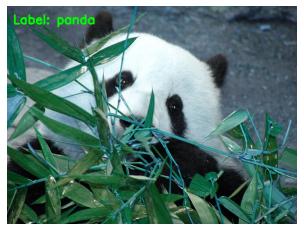

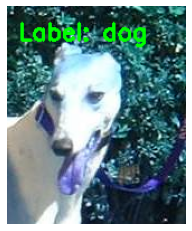

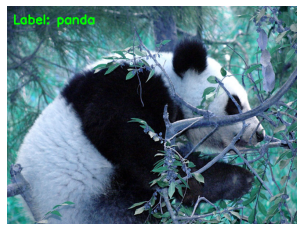

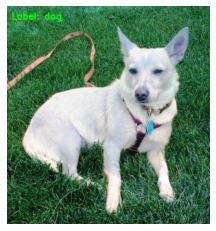

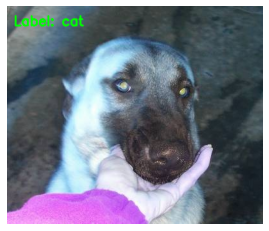

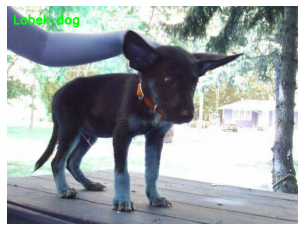

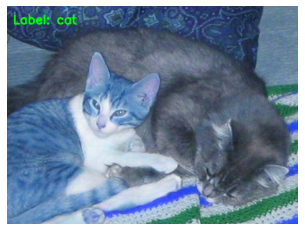

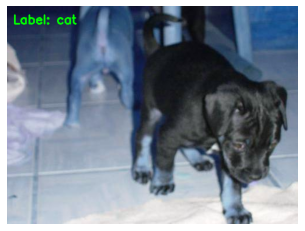

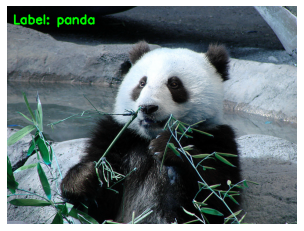

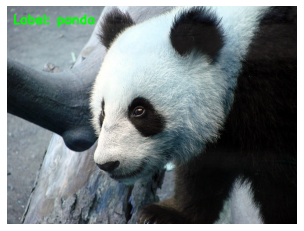

In [31]:
for (i, imagePath) in enumerate(imagePaths):
    # load the example image, draw the prediction, and display it
    # to our screen
    image = cv2.imread(imagePath)
    cv2.putText(image, "Label: {}".format(classLabels[preds[i]]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    plt.imshow(image)
    plt.axis('off')
    plt.show()